# Storytelling Through Data Visualization
---

This time we'll focus on how to use data visualization to communicate insights and tell stories.

Our dataset will give us some insights into the gender gap in STEM fields in the US.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


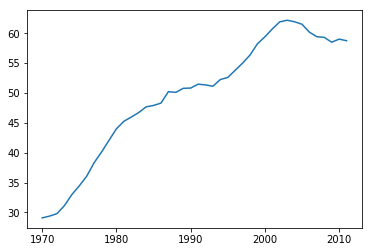

In [3]:
plt.plot(women_degrees["Year"], women_degrees["Biology"])
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the `Biology` column from `100`. Once we have the male percentages, we can generate two line charts as part of the same diagram.

Let's now create a diagram containing both the line charts we just described.

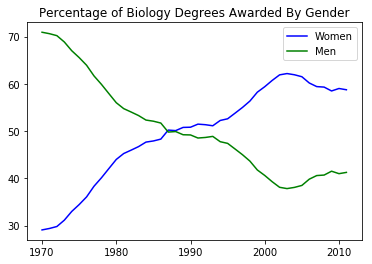

In [4]:
fig = plt.figure()
plt.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue", label = "Women")
plt.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c = "green", label = "Men")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc = "upper right")

plt.show()

The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as [chartjunk](https://en.wikipedia.org/wiki/Chartjunk), increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the [data-ink](https://infovis-wiki.net/wiki/Data-Ink_Ratio) ratio, which is the fractional amount of the plotting area dedicated to displaying the data.

Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), a pioneer of the field of data visualization. Tufte's first book, [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), is considered a bible among information designers.

To improve the data-ink ratio, let's make the following changes to the plot we created:

* Remove all of the axis tick marks
* Hide the spines, which are the lines that connects the tick marks, on each axis


To customize the appearance of the ticks, we use the [Axes.tick_params()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

* The left side is the y-axis.
* The bottom side is the x-axis.
* The top side is across from the x-axis.
* The right side is across from the y-axis.

The parameters for enabling or disabling tick marks are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call `Axes.tick_params()`:

* `bottom`: `False`
* `top`: `False`
* `left`: `False`
* `right`: `False`

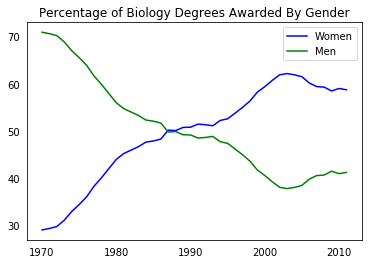

In [5]:
fig, ax = plt.subplots()
ax.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue", label = "Women")
ax.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c = "green", label = "Men")
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc = "upper right")
ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the [matplotlib.spines.Spine](http://matplotlib.org/api/spines_api.html) class. When we create an Axes instance, four Spine objects are created for us.

In [6]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x7f1c9bfe8e48>),
             ('right', <matplotlib.spines.Spine at 0x7f1c9bff35c0>),
             ('bottom', <matplotlib.spines.Spine at 0x7f1c9bff3160>),
             ('top', <matplotlib.spines.Spine at 0x7f1c9bff9ef0>)])

To hide all of the spines, we need to:

* access each Spine object in the dictionary
* call the [`Spine.set_visible()`](https://matplotlib.org/gallery/ticks_and_spines/spines_bounds.html?highlight=spine%20set_visible) method
* pass in the Boolean value `False`

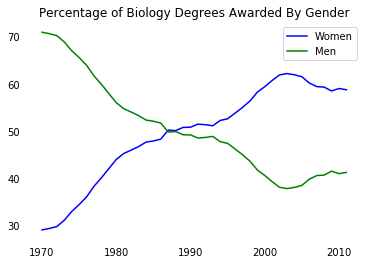

In [7]:
fig, ax = plt.subplots()
ax.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue", label = "Women")
ax.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c = "green", label = "Men")
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc = "upper right")
ax.tick_params(bottom=False, top=False, left=False, right=False)

[ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]

plt.show()

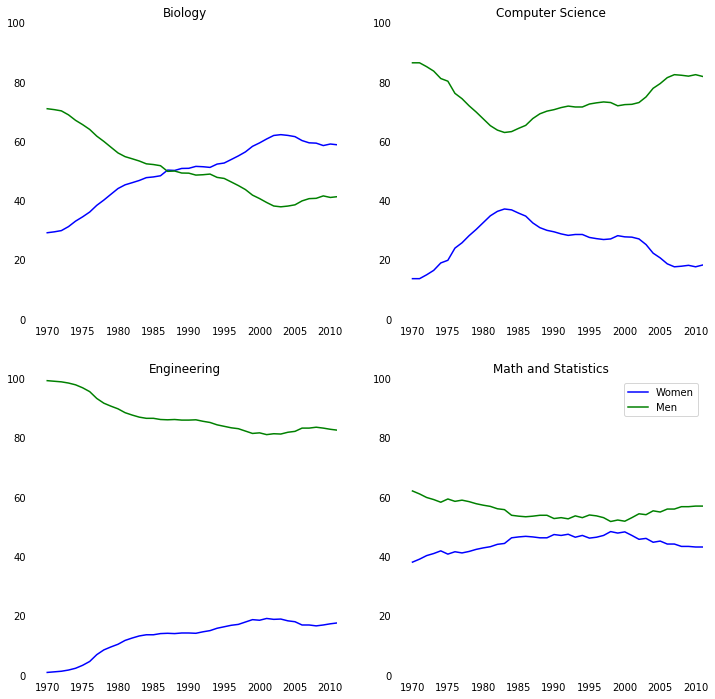

In [8]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for position in range(0,4):
    ax = fig.add_subplot(2,2,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[position]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[position]], c='green', label='Men')
    ax.set_title(major_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

The [Color Blind 10](https://public.tableau.com/profile/chris.gerrard#!/vizhome/TableauColors/ColorPaletteswithRGBValues) palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. You'll notice that next to each color strip are three integer values, separated by periods (`.`):

<img src="https://s3.amazonaws.com/dq-content/tableau_rgb_values.png" alt="ColorBlind10" width="600"/>

These numbers represent the RGB values for each color. The [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color. The RGB color model is very familiar to people who work in photography, filmography, graphic design, and any field that use colors extensively. In computers, each RGB value can range between 0 and 255. This is because 256 integer values can be represented using 8 bits. You can read more about 8-bit color [here](https://en.wikipedia.org/wiki/8-bit_color).

To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).

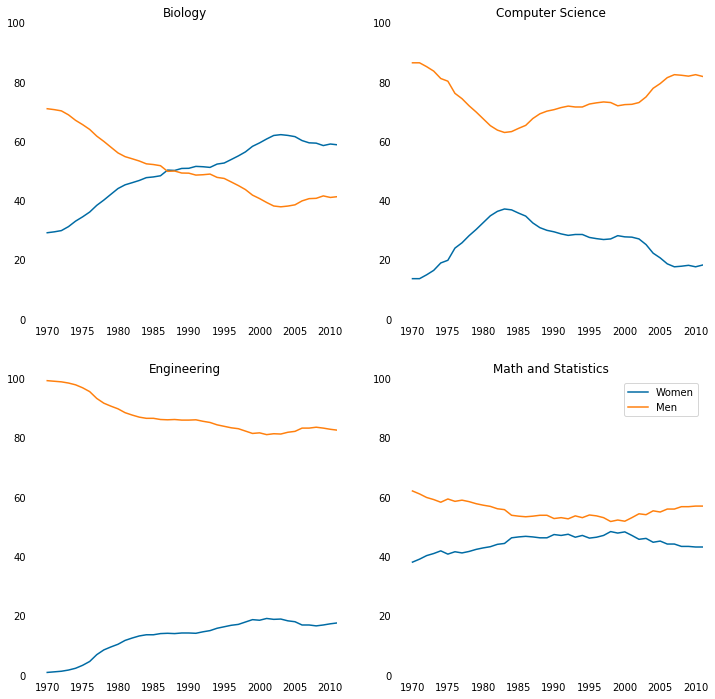

In [9]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,4):
    ax = fig.add_subplot(2,2,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[position]], c = cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[position]], c = cb_orange, label='Men')
    ax.set_title(major_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

plt.legend(loc='upper right')
plt.show()

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the `Axes.plot()` method, we can use the `linewidth` parameter to specify the line width. Matplotlib expects a float value for this parameter.

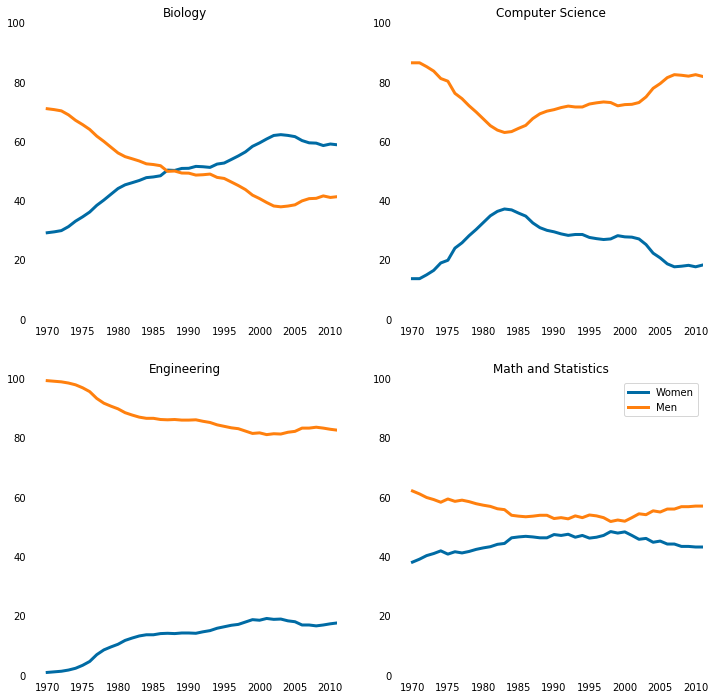

In [10]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,4):
    ax = fig.add_subplot(2,2,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[position]], 
            c = cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[position]], 
            c = cb_orange, label='Men', linewidth = 3)
    ax.set_title(major_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

plt.legend(loc='upper right')
plt.show()

Now, let's visualize all six STEM degrees. To make the viewing experience more coherent, we can:

* use layout of a single row with multiple columns
* order the plots in decreasing order of initial gender gap

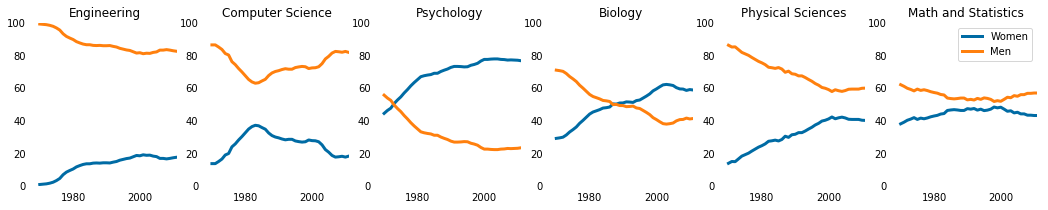

In [11]:
stem_cats = ['Engineering', 'Computer Science', 
             'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18, 3))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,6):
    ax = fig.add_subplot(1,6,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[position]], 
            c = cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[position]], 
            c = cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

plt.legend(loc='upper right')
plt.show()

The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders.

To add text annotations to a matplotlib plot, we use the [`Axes.text()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.text) method. This method has a few required parameters:

* `x`: x-axis coordinate (as a float)
* `y`: y-axis coordinate (as a float)
* `s`: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis. 

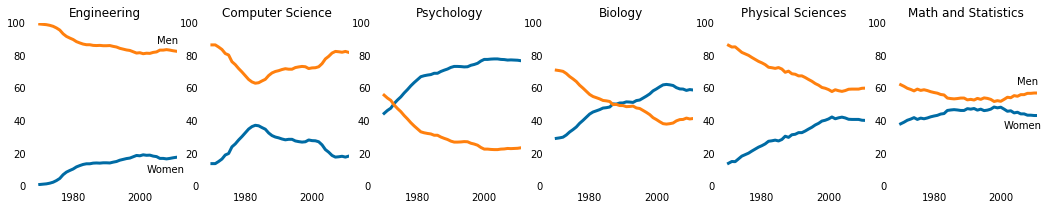

In [12]:
stem_cats = ['Engineering', 'Computer Science', 
             'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18, 3))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,6):
    ax = fig.add_subplot(1,6,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[position]], 
            c = cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[position]], 
            c = cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    if position == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif position == 5:
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")

plt.show()

Now it looks way much better!

---

## Conditional Plots with Seaborn and Python
---

This time we'll explore how to quickly create multiple plots that are subsetted using one or more conditions.

We'll be working with the seaborn visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Before we dive into seaborn, let's understand the data set we'll be working with in this mission.

The data set was compiled by Kaggle for their introductory data science competition, called [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The data for the passengers is contained in two files:

* `train.csv`: Contains data on 712 passengers
* `test.csv`: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the `train.csv` file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in `test.csv`, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in `train.csv`:

* `PassengerId` -- A numerical id assigned to each passenger
* `Survived` -- Whether the passenger survived (1), or didn't (0)
* `Pclass` -- The class the passenger was in
* `Name` -- the name of the passenger
* `Sex` -- The gender of the passenger -- male or female
* `Age` -- The age of the passenger. Fractional
* `SibSp` -- The number of siblings and spouses the passenger had on board
* `Parch` -- The number of parents and children the passenger had on board
* `Ticket` -- The ticket number of the passenger
* `Fare` -- How much the passenger paid for the ticket
* `Cabin` -- Which cabin the passenger was in
* `Embarked` -- Where the passenger boarded the Titanic

In [13]:
import pandas as pd

titanic = pd.read_csv("train.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's remove columns like `Name` and `Ticket` that we don't have a way to visualize. In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.

In [14]:
import pandas as pd

titanic = pd.read_csv("train.csv")

Checking the original shape...

In [15]:
titanic.shape

(891, 12)

In [16]:
dropping_columns = ["PassengerId", "Name", "Ticket", "Cabin"]

titanic.drop(dropping_columns, axis = 1, inplace = True)
titanic.dropna(inplace = True)

Checking the new shape!

In [17]:
titanic.shape

(712, 8)

Seaborn works similarly to the pyplot module from matplotlib. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the pyplot module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call `pyplot.show()`.

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the Fare column using the [`seaborn.distplot()`](http://seaborn.pydata.org/generated/seaborn.distplot.html) function:

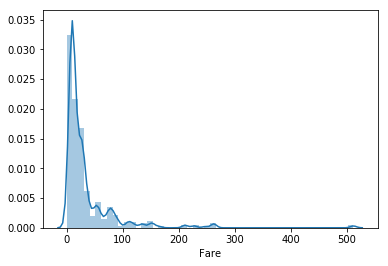

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(titanic["Fare"])
plt.show()

# the future warnings are okay, it's on the part of the scipy library

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about how KDE works, you can read more on [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation).

What you need to know for now is that the resulting line is a smoother version of the histogram, called a **kernel density plot**. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.

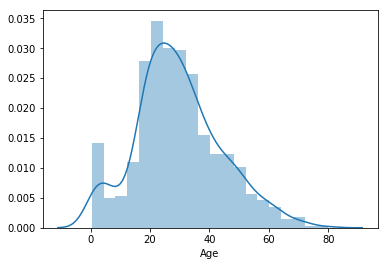

In [19]:
sns.distplot(titanic["Age"])
plt.show()

To generate just the kernel density plot, we use the [`seaborn.kdeplot()`](http://seaborn.pydata.org/generated/seaborn.kdeplot.html) function:

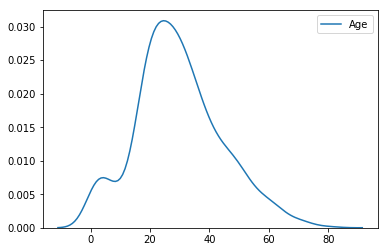

In [20]:
sns.kdeplot(titanic["Age"])

While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the `seaborn.kdeplot()` function, we can shade the area under the line by setting the `shade` parameter to `True`.

Text(0.5, 0, 'Age')

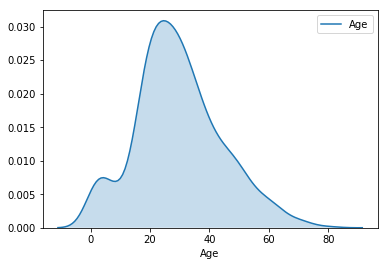

In [21]:
sns.kdeplot(titanic["Age"], shade = True)
plt.xlabel("Age")

We've already explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the [`seaborn.set_style()`](http://seaborn.pydata.org/generated/seaborn.set_style.html) function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

* darkgrid: Coordinate grid displayed, dark background color
* whitegrid: Coordinate grid displayed, white background color
* dark: Coordinate grid hidden, dark background color
* white: Coordinate grid hidden, white background color
* ticks: Coordinate grid hidden, white background color, ticks visible

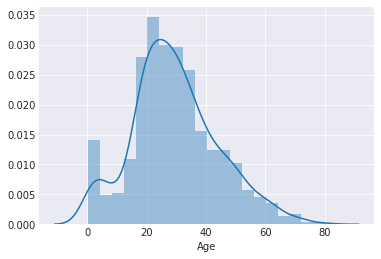

In [22]:
sns.set_style("darkgrid")
sns.distplot(titanic["Age"])
plt.show()

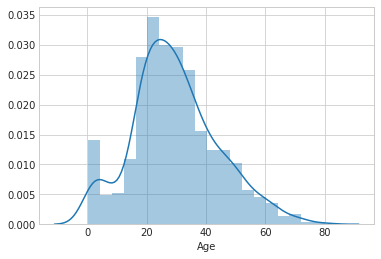

In [23]:
sns.set_style("whitegrid")
sns.distplot(titanic["Age"])
plt.show()

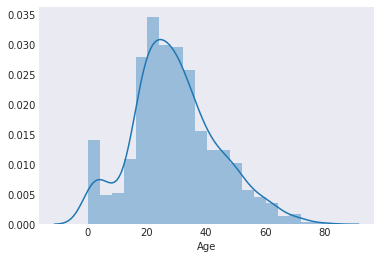

In [24]:
sns.set_style("dark")
sns.distplot(titanic["Age"])
plt.show()

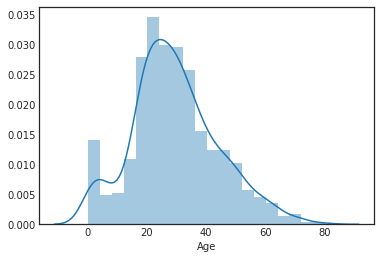

In [25]:
sns.set_style("white")
sns.distplot(titanic["Age"])
plt.show()

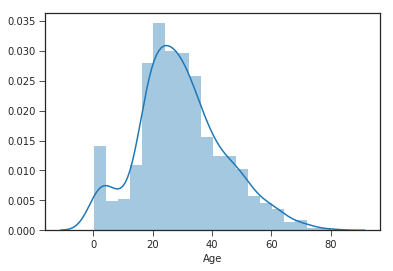

In [26]:
sns.set_style("ticks")
sns.distplot(titanic["Age"])
plt.show()

If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the [`seaborn.despine()`](http://seaborn.pydata.org/generated/seaborn.despine.html) function. By default, only the top and right axes will be despined, or have their spines removed. To despine the other two axes, we need to set the `left` and `bottom` parameters to `True`.

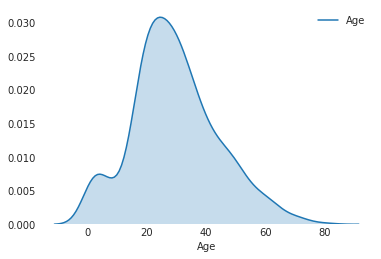

In [27]:
sns.set_style("white")
sns.kdeplot(titanic["Age"], shade = True)
plt.xlabel("Age")
sns.despine(left = True, bottom = True)
plt.show()

Previously, we created a [small multiple](https://en.wikipedia.org/wiki/Small_multiple), which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the `"Age"` column where `Survived` equalled `0` and the other would visualize the distribution of values in the `"Age"` column where `Survived` equalled `1`.

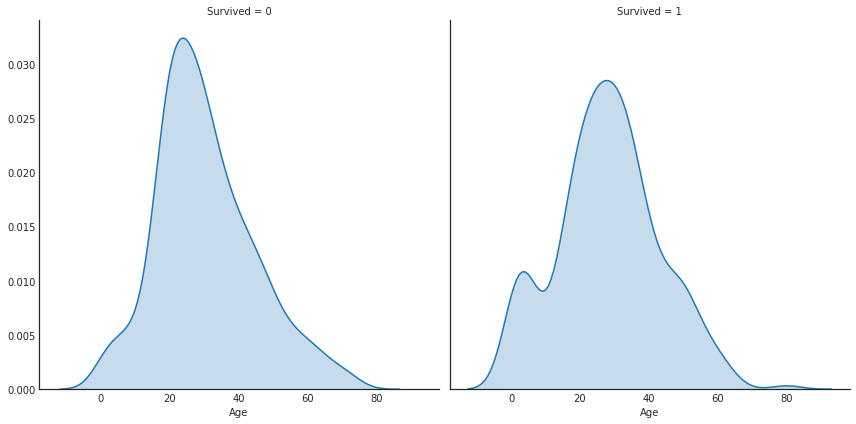

In [28]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)

Seaborn handled:

* subsetting the data into rows where Survived is 0 and where Survived is 1
* creating both Axes objects, ensuring the same axis scales
* plotting both kernel density plots

Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The [`seaborn.FacetGrid`](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from `FacetGrid` is another word for "subset". Setting the `col` parameter to `"Survived"` specifies a separate plot for each unique value in the `Survived` column. Setting the `size` parameter to `6` specifies a height of 6 inches for each plot.

Once we've created the grid, we use the [`FacetGrid.map()`](http://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html) method to specify the plot we want for each unique value of `Survived`. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into `FacetGrid.map()` has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

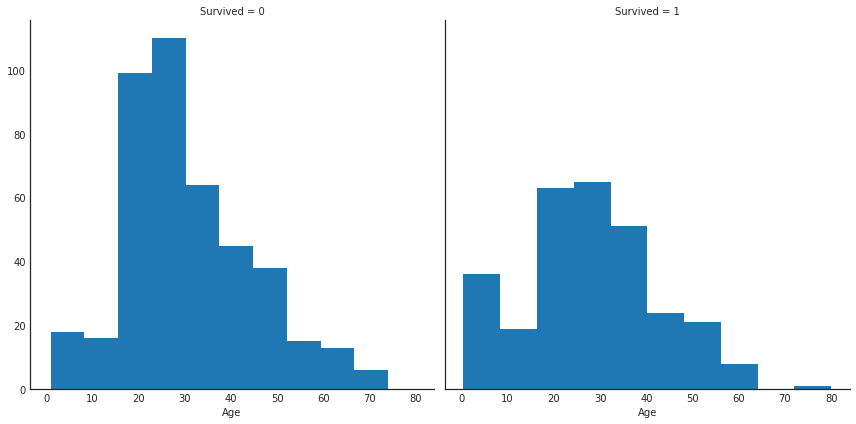

In [29]:
g = sns.FacetGrid(titanic, col="Survived", size=6)
g.map(plt.hist, "Age")

Let's create a grid of plots that displays the age distributions for each class:

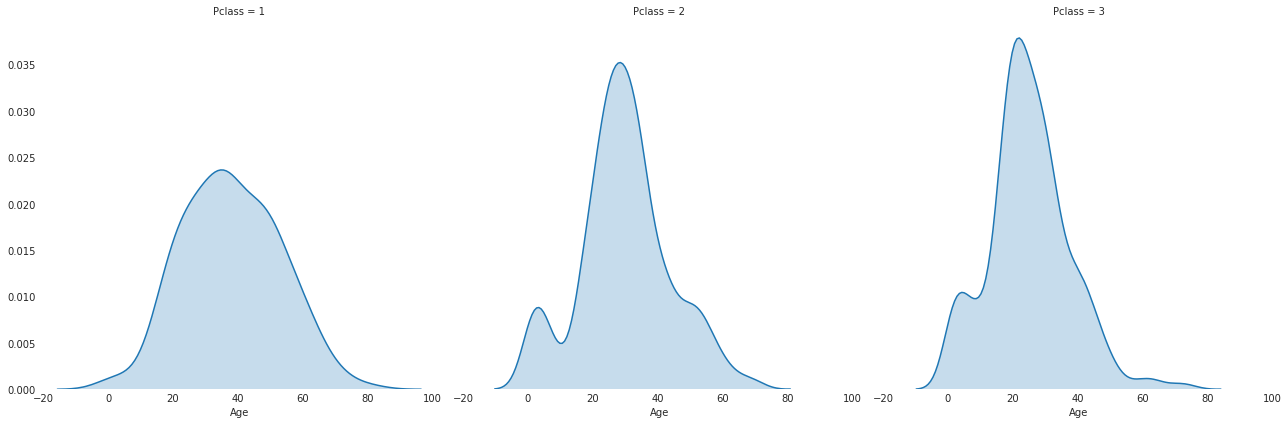

In [30]:
g = sns.FacetGrid(titanic, col = "Pclass", size = 6)
g.map(sns.kdeplot, "Age", shade = True)
sns.despine(left = True, bottom = True)

plt.show()

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a `FacetGrid`, we use the `row` parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

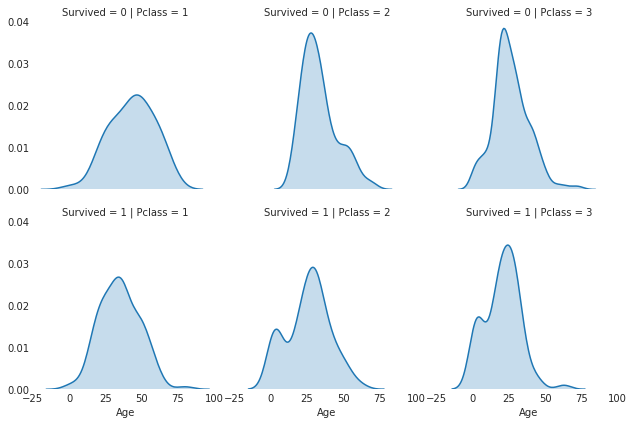

In [31]:
g = sns.FacetGrid(titanic, row="Survived", col="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the `hue` parameter to the column name from the dataframe.

Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like:

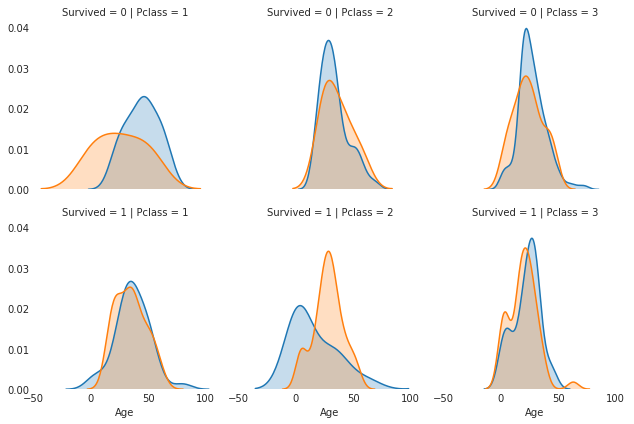

In [32]:
g = sns.FacetGrid(titanic, row="Survived", col="Pclass", hue = "Sex", size = 3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

Now that we're coloring plots, we need a legend to keep track of which value each color represents. As a challenge to you, we won't specify how exactly to generate a legend in seaborn. Instead, we encourage you to use the examples from the [page](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) on plotting using the `FacetGrid` instance.

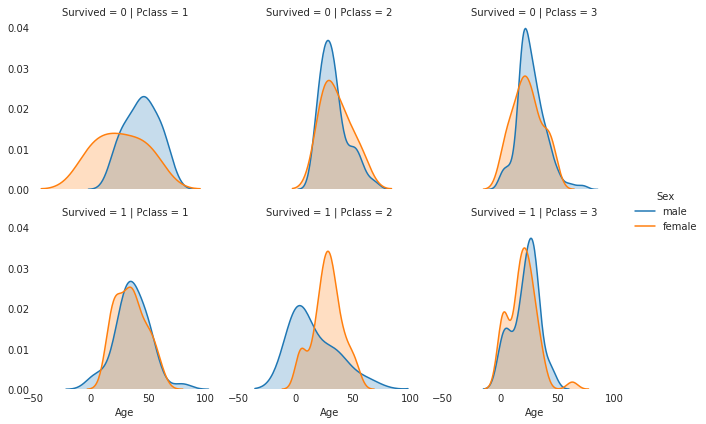

In [33]:
g = sns.FacetGrid(titanic, row="Survived", col="Pclass", hue = "Sex", size = 3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

Looks interesting!

By the way, as usual, there's quite a [cool tutorial](http://seaborn.pydata.org/tutorial.html) on the seaborn webpage. Check em out.

---

## Visualizing Geographic Data
---

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives. Raw geographic data like latitudes and longitudes are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.

This time, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights website](http://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

* airlines.csv - data on each airline
    * country - where the airline is headquartered
    * active - if the airline is still active

* airports.csv - data on each airport
    * name - name of the airport
    * city - city the airport is located
    * country - country the airport is located
    * code - unique airport code
    * latitude - latitude value
    * longitude - longitude value

* routes.csv - data on each flight route
    * airline - airline for the route
    * source - starting city for the route
    * dest - destination city for the route

We can explore a range of interesting questions and ideas using these datasets:

* For each airport, which destination airport is the most common?
* Which cities are the most important hubs for airports and airlines?

Before diving into coordinate systems, let's explore the datasets in the code cell below:

In [34]:
import pandas as pd

airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

print(airports.iloc[0], "\n")
print(airlines.iloc[0], "\n")
print(routes.iloc[0], "\n")

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object 

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object 

airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object 



In most cases, we want to visualize latitude and longitude points on two-dimensional maps. Two-dimensional maps are faster to render, easier to view on a computer and distribute, and are more familiar to the experience of popular mapping software like Google Maps. Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a **map projection**.

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). We'll use the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection), because it is commonly used by popular mapping software.

Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the [basemap toolkit](http://matplotlib.org/basemap/). Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The [documentation for basemap](http://matplotlib.org/basemap/users/intro.html) provides a good high-level overview of what the library does:

    The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.

Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly. Before we dive into how basemap works, let's get familiar with how to install it.

The easiest way to install basemap is through Anaconda. If you're new to Anaconda, we recommend checking out the [installation documentation](https://conda.io/docs/user-guide/install/index.html):

```conda
conda install basemap
```

If the above code does not work for you, you can install Basemap through the Linux command line using the following code:

```bash
conda install -c conda-forge basemap
```

The Basemap library has some external dependencies that Anaconda handles the installation for. To test the installation, run the following import code:

```python
from mpl_toolkits.basemap import Basemap
```

Here's what the general workflow will look like when working with two-dimensional maps:

* Create a new basemap instance with the specific map projection we want to use and how much of the map we want included
* Convert spherical coordinates to Cartesian coordinates using the basemap instance
* Use the matplotlib and basemap methods to customize the map
* Display the map

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the [basemap constructor](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap) and pass in values for the required parameters:

* `projection`: the map projection
* `llcrnrlat`: latitude of lower left hand corner of the desired map domain
* `urcrnrlat`: latitude of upper right hand corner of the desired map domain
* `llcrnrlon`: longitude of lower left hand corner of the desired map domain
* `urcrnrlon`: longitude of upper right hand corner of the desired map domain

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection = "merc", 
    llcrnrlat = -80, 
    urcrnrlat = 80, 
    llcrnrlon = -180, 
    urcrnrlon = 180
)

As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use [`Series.tolist()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.tolist.html) to convert the `longitude` and `latitude` columns from the `airports` dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:

```python
x, y = m(longitudes, latitudes)
```

The basemap object will return 2 list objects, which we assign to `x` and `y`. Finally, we display the first 5 elements of the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.

In [36]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

x, y = m(longitudes, latitudes)

Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of `x` and `y` coordinates, we use the [`basemap.scatter()`](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.scatter) method.

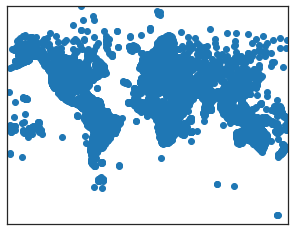

In [37]:
m.scatter(x,y)

The `basemap.scatter()` method has similar parameters to the [`pyplot.scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). For example, we can customize the size of each marker using the `s` parameter:

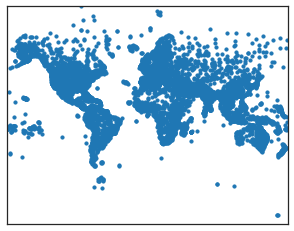

In [38]:
# Large markers.
m.scatter(x,y,s=10)

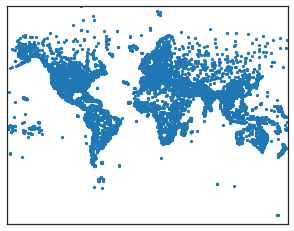

In [39]:
# Smaller markers.
m.scatter(x,y,s=5)

After we've created the scatter plot, use `plt.show()` to display the plot.

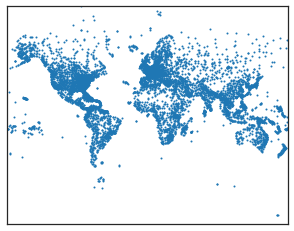

In [40]:
m.scatter(x, y, s = 1)
plt.show()

You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the [`basemap.drawcoastlines()`](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawcoastlines) method.

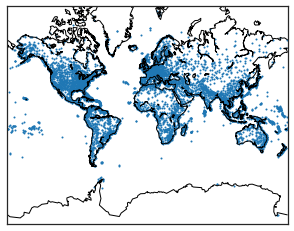

In [41]:
m.scatter(x, y, s = 1)
m.drawcoastlines()
plt.show()

ecause basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly to customize the appearance of the map.

We can add code that:

* uses `pyplot.subplots()` to specify the `figsize` parameter
* returns the Figure and Axes object for a single subplot and assigns to `fig` and `ax` respectively
* use the `Axes.set_title()` method to set the map title

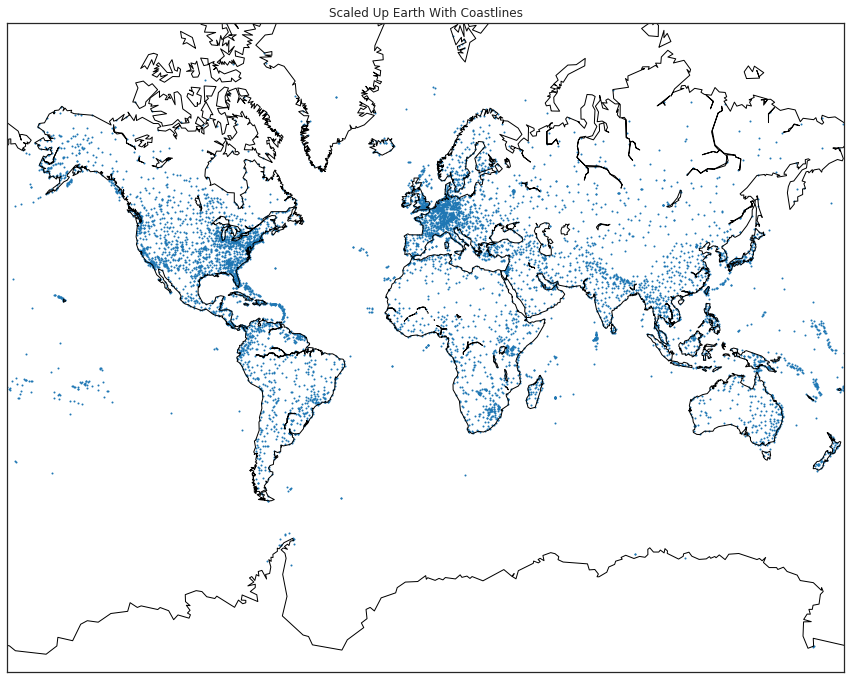

In [42]:
fig = plt.figure(figsize = (15, 20))
plt.title("Scaled Up Earth With Coastlines")
# Add code here, before creating the Basemap instance.
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

To better understand the flight routes, we can draw **great circles** to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection. We can use these to visualize the flight routes from the `routes` dataframe. To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. While the `routes` dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (`airports`).

To make things easier, dataquest created a new CSV file called `geo_routes.csv` that contains the latitude and longitude values corresponding to the source and destination airports for each route. They've also removed some columns we won't be working with.

In [43]:
geo_routes = pd.read_csv("geo_routes.csv")

geo_routes.info()
geo_routes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


We use the [`basemap.drawgreatcircle()`](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle) method to display a great circle between 2 points. The `basemap.drawgreatcircle()` method requires four parameters in the following order:

* lon1 - longitude of the starting point
* lat1 - latitude of the starting point
* lon2 - longitude of the ending point
* lat2 - latitude of the ending point

The following code generates a great circle for the first three routes in the dataframe:

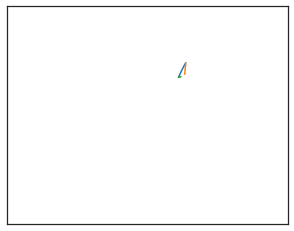

In [44]:
m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)

Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the `basemap.drawgreatcircle()` method isn't able to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the [documentation](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle) for the method:

*Note: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.*

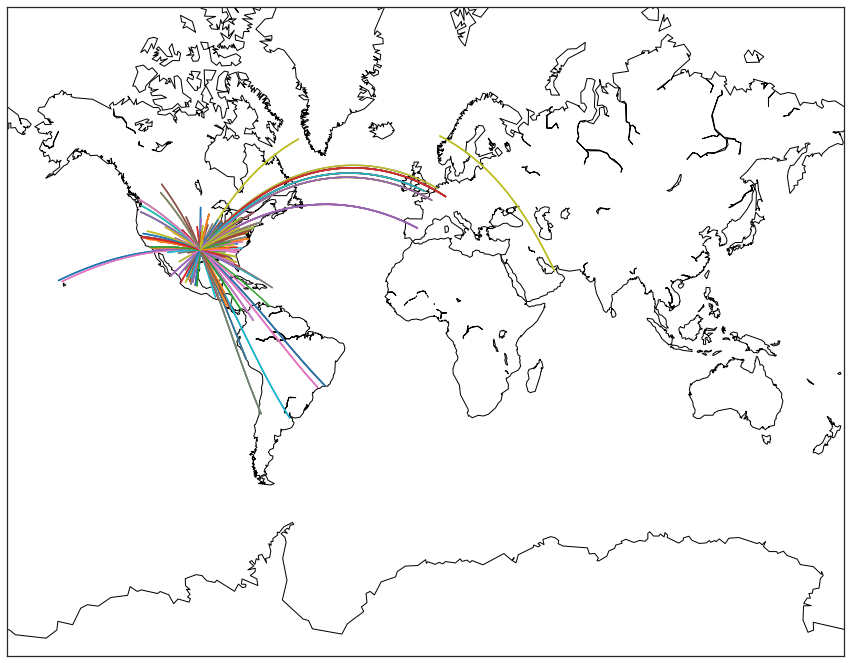

In [45]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        if abs(row["end_lat"] - row["start_lat"]) < 180 and abs(row["end_lon"] - row["start_lon"]) < 180:
            m.drawgreatcircle(row["start_lon"], row["start_lat"], row["end_lon"], row["end_lat"])

dfw = geo_routes[geo_routes["source"] == "DFW"]

create_great_circles(dfw)
plt.show()

Well done!

P.S.:

We encourage you to keep exploring data visualization on your own. Here are some suggestions for what to do next:

Plotting tools:
* [Creating 3D plots using Plotly](https://plot.ly/python/3d-scatter-plots/)
* [Creating interactive visualizations using bokeh](http://bokeh.pydata.org/en/latest/)
* [Creating interactive map visualizations using folium](https://folium.readthedocs.io/en/latest/)

The art and science of data visualization:
* [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142)
* [Visual Explanations: Images and Quantities, Evidence and Narrative](https://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/0961392126)

# THE END!